<a href="https://colab.research.google.com/gist/daryarudenko/c1fd06d5db0d0f3bc35031617f11ec8f/eda_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. СОЗДАНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ

In [ ]:
#Расчитаем выручку по каждой позиции
#Для этого создадим новый признак - произведение количества товара на его цену
onl['Revenue'] = onl['Quantity'] * onl['Price']

#Посмотрим первых 5 записей с новым столбцом
display(onl.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_recency,Revenue
0,489434,85048,15Cm Christmas Glass Ball 20 Lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,739 days,83.4
1,489434,79323P,Pink Cherry Lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,739 days,81.0
2,489434,79323W,White Cherry Lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,739 days,81.0
3,489434,22041,"Record Frame 7"" Single Size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,739 days,100.8
4,489434,21232,Strawberry Ceramic Trinket Box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,739 days,30.0


2. ВРЕМЕННОЙ АНАЛИЗ

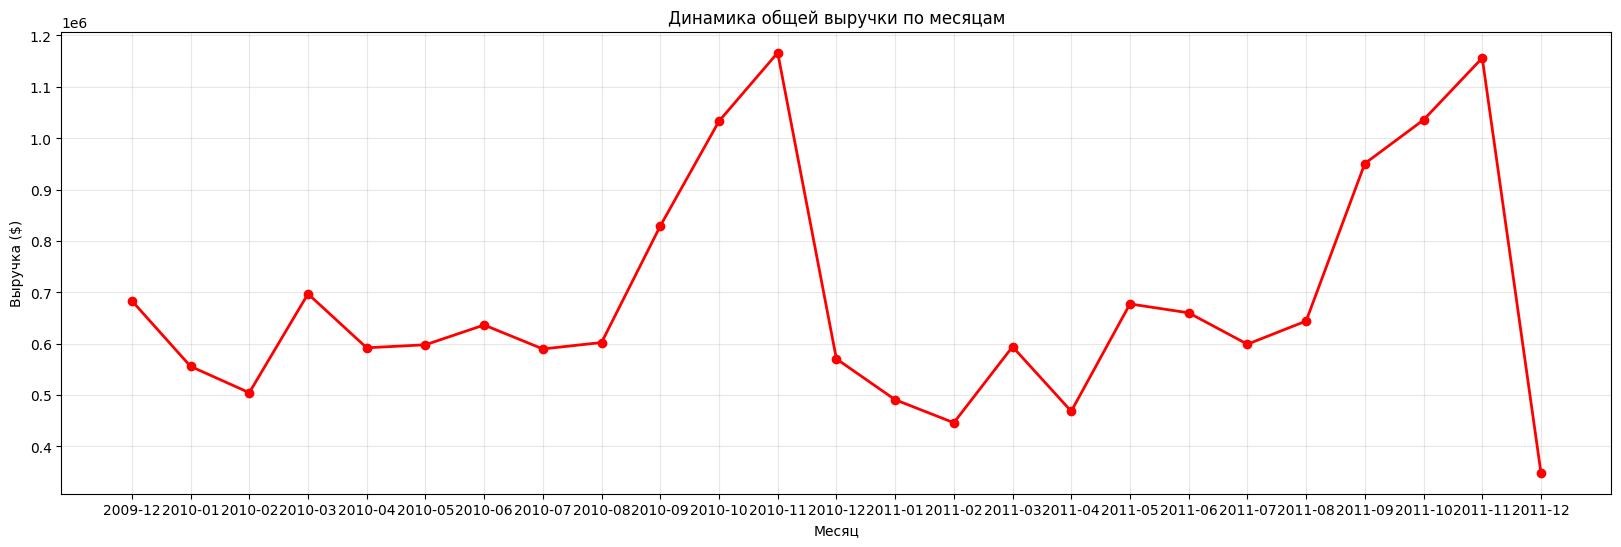

In [ ]:
#Проведем анализ по месяцам
import matplotlib.pyplot as plt

#Извлечем года и месяца из даты инвойса
onl['year'] = onl['InvoiceDate'].dt.year
onl['month'] = onl['InvoiceDate'].dt.month

#Сгруппируем выручку по годам и месяцам
monthly_revenue = onl.groupby(['year', 'month'])['Revenue'].sum()

#Визуализируем динамику выручки по месяцам
plt.figure(figsize=(20, 6))
monthly_revenue.index = [f'{year}-{month:02d}' for year, month in monthly_revenue.index]
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2, markersize=6, color='red')
plt.title('Динамика общей выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка ($)')
plt.grid(True, alpha=0.3)
plt.show()


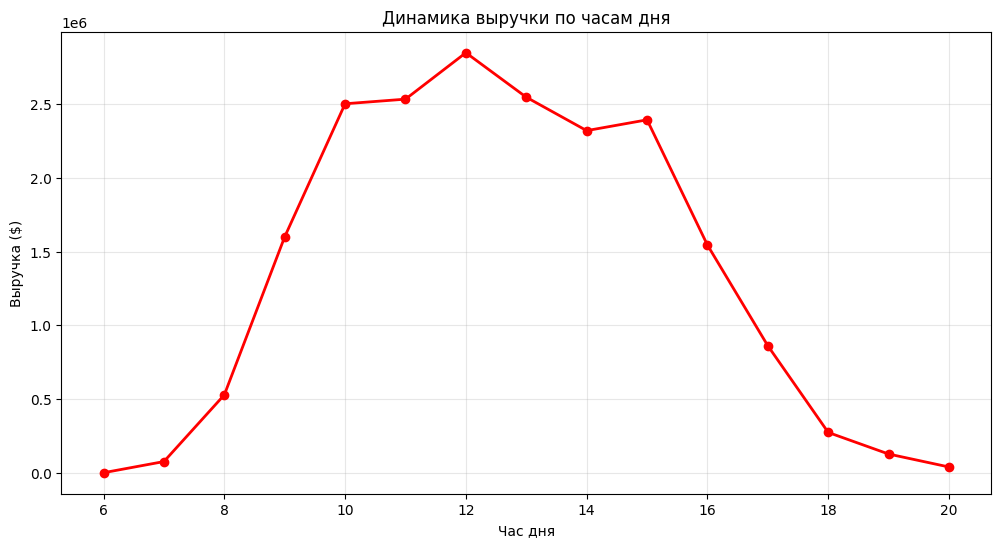

In [ ]:
#Проведем анализ по часам дня
import matplotlib.pyplot as plt

#Извлечем часы из даты инвойса
onl['hour'] = onl['InvoiceDate'].dt.hour

#Сгруппируем выручку по часам
hourly_revenue = onl.groupby('hour')['Revenue'].sum()

#Визуализируем распределение выручки по часам
plt.figure(figsize=(12, 6))
plt.plot(hourly_revenue.index, hourly_revenue.values, marker='o', linewidth=2, markersize=6, color='red')
plt.title('Динамика выручки по часам дня')
plt.xlabel('Час дня')
plt.ylabel('Выручка ($)')
plt.grid(True, alpha=0.3)
plt.show()

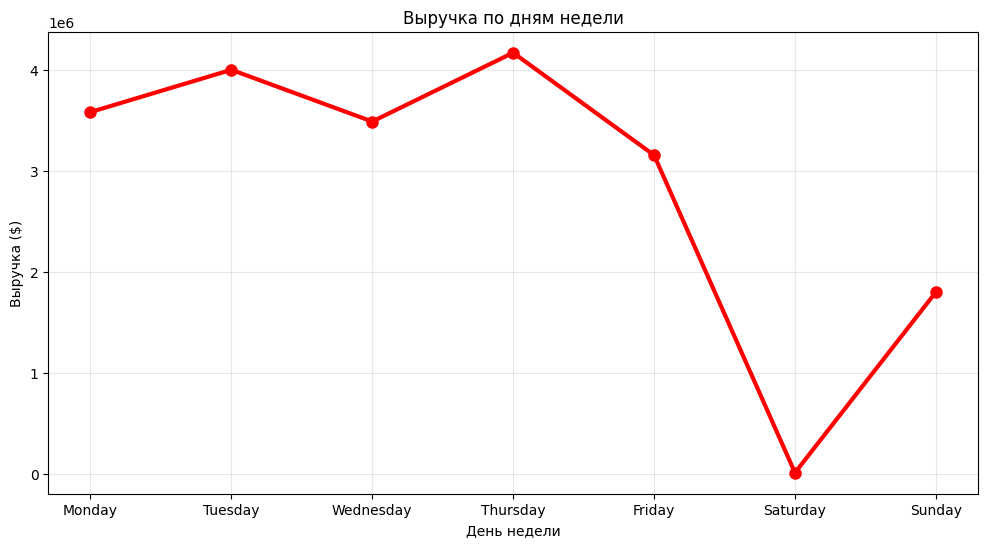

In [ ]:
#Проведем анализ по дням недели
import matplotlib.pyplot as plt

#Извлечем название дня недели
onl['day_of_week'] = onl['InvoiceDate'].dt.day_name()

#Группируем выручку по дням недели
daily_revenue = onl.groupby('day_of_week')['Revenue'].sum()

#Сортируем дни в правильном порядке
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue = daily_revenue.reindex(days_order)

#Визуализируем выручку по дням недели
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue.index, daily_revenue.values,
         marker='o', linewidth=3, markersize=8, color='red')
plt.title('Выручка по дням недели')
plt.xlabel('День недели')
plt.ylabel('Выручка ($)')
plt.grid(True, alpha=0.3)
plt.show()

3. ИНЖИНИРИНГ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

In [ ]:
#Категоризируем время суток
def a(hour):
  if 0 <= hour < 6:
        return 'Ночь'
  elif 6 <= hour < 12:
        return 'Утро'
  elif 12 <= hour < 18:
        return 'День'
  else:
        return 'Вечер'

#Примененим функцию для создания нового признака
onl['hour'] = onl['InvoiceDate'].dt.hour
onl['Time_of_Day'] = onl['hour'].apply(a)

#Проверка результата
display(onl[['InvoiceDate', 'Time_of_Day']])

,InvoiceDate,Time_of_Day
0,2009-12-01 07:45:00,Утро
1,2009-12-01 07:45:00,Утро
2,2009-12-01 07:45:00,Утро
3,2009-12-01 07:45:00,Утро
4,2009-12-01 07:45:00,Утро
...,...,...
1067366,2011-12-09 12:50:00,День
1067367,2011-12-09 12:50:00,День
1067368,2011-12-09 12:50:00,День
1067369,2011-12-09 12:50:00,День


In [ ]:
#Категоризируем сезоны
def b(month):
  if month in [12, 1, 2]:
        return 'Зима'
  elif month in [3, 4, 5]:
        return 'Весна'
  elif month in [6, 7, 8]:
        return 'Лето'
  else:
        return 'Осень'

#Применим функцию для создания нового признака
onl['month'] = onl['InvoiceDate'].dt.month
onl['Season'] = onl['month'].apply(b)

#Проверка результата
display(onl[['InvoiceDate', 'Season']])

,InvoiceDate,Season
0,2009-12-01 07:45:00,Зима
1,2009-12-01 07:45:00,Зима
2,2009-12-01 07:45:00,Зима
3,2009-12-01 07:45:00,Зима
4,2009-12-01 07:45:00,Зима
...,...,...
1067366,2011-12-09 12:50:00,Зима
1067367,2011-12-09 12:50:00,Зима
1067368,2011-12-09 12:50:00,Зима
1067369,2011-12-09 12:50:00,Зима


ПРОВЕДЕН АНАЛИЗ:
   1. Динамика выручки по месяцам (временной тренд)
   2. Динамика выручки по часам (пиковые часы)
   3. Динамика выручки по дням недели

ВЫЯВЛЕННЫЕ ПАТТЕРНЫ:
   1. Максимальная выручка приходится на дневные часы (10-16)
   2. Самые активные дни - будни, особенно четверг и вторник
   3. Ярко выраженная сезонность